# OpenCV Getting and Setting Pixels
* 픽셀은 무엇인지?
* OpenCV에서 이미지좌표시스템의 동작원리
* 이미지에서 개별 픽셀값 엑세스
* 특정 이미지의 픽셀값 변경 및 셋업
* 이미지의 특정영역을 잡기위한 배열 슬라이싱 사용
* [픽셀 참조](https://www.pyimagesearch.com/2021/01/20/opencv-getting-and-setting-pixels/)
* [numpy slicing](https://numpy.org/doc/stable/reference/arrays.indexing.html)
* [Argument Parsing](https://www.pyimagesearch.com/2018/03/12/python-argparse-command-line-arguments/)

### 넘파이 인덱싱

In [1]:
import numpy as np

In [2]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
display(x)
display(x[1:7:2]) # 1번째 인덱스부터 6번째 인덱스까지 가져오는데 스텝은 2번째마다 가져오기 -> 1, 3, 5

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([1, 3, 5])

In [13]:
x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
display(x.shape)
display(x[0:2])
display(x[1:2])

(2, 3, 1)

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

array([[[4],
        [5],
        [6]]])

### 이미지 좌표시스템
* 아래의 경우는 8 * 8 = 64개의 pixel값으로 이루어진 이미지.

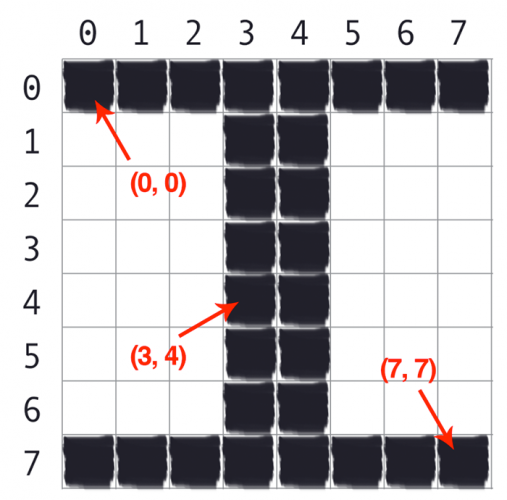

In [ ]:
from IPython.display import Image
Image("/content/opencv-getting-setting/opencv_getting_setting_image_coordinates-e1609416591370.png")

### 픽셀
- Grayscale/single channel(0 -검은색 ~ 255-흰색)<br>
  0에 가까워질수록 색깔이 검어지고, 255에 가까울수록 색이 하야짐.
- RGB <br>
  각각의 R, G, B가 0 ~ 255의 8비트 Unsigned Integer로 표현

### 이미지 다운로드

In [14]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-getting-setting/opencv-getting-setting.zip
!unzip -qq opencv-getting-setting.zip
%cd opencv-getting-setting

--2021-04-21 02:48:11--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-getting-setting/opencv-getting-setting.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.136.153
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.136.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 336672 (329K) [application/zip]
Saving to: ‘opencv-getting-setting.zip’

opencv-getting-sett 100%[===================>] 328.78K   615KB/s    in 0.5s    

2021-04-21 02:48:12 (615 KB/s) - ‘opencv-getting-setting.zip’ saved [336672/336672]

/content/opencv-getting-setting


## 수행 절차

### 패키지 임포트

In [15]:
from matplotlib import pyplot as plt 
import cv2
import argparse   # argument parsing

### 쥬피터노트북과 코랩에서 이미지 표출 함수

In [21]:
def plt_imshow(title, image):
  '''
  이미지를 BGR에서 RGB로 변환하고 화면에서 보여주기 
  '''
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title(title)
  plt.imshow(image)
  plt.grid(True)
  plt.show()

### OpenCV를 이용한 이미지 픽셀정보 셋업 및 얻기

In [17]:
# 콘솔에서 파이썬 스크립트를 수행시 인자를 파싱하는 역할
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, default="adrian.png",
#	help="path to the input image")
#args = vars(ap.parse_args())

# 쥬피터 노트특 혹은 코랩 사용시.
# 인자를 Dictionary타입으로 전달.
args = {
	"image": "adrian.png"
}

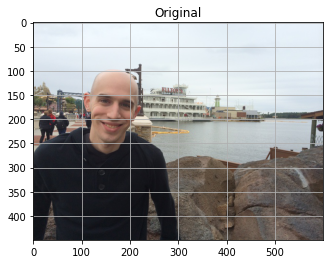

(450, 600, 3)

array([[[246, 240, 233],
        [244, 238, 231],
        [243, 237, 230],
        ...,
        [249, 240, 231],
        [249, 240, 231],
        [250, 241, 232]],

       [[245, 239, 232],
        [244, 238, 231],
        [243, 237, 230],
        ...,
        [249, 240, 231],
        [249, 240, 231],
        [249, 240, 231]],

       [[244, 238, 231],
        [244, 238, 231],
        [244, 238, 231],
        ...,
        [249, 240, 231],
        [248, 239, 230],
        [248, 239, 230]],

       ...,

       [[ 35,  30,  29],
        [ 32,  27,  26],
        [ 28,  23,  22],
        ...,
        [ 63,  65,  73],
        [ 68,  70,  80],
        [ 75,  77,  87]],

       [[ 28,  22,  23],
        [ 27,  22,  19],
        [ 25,  20,  17],
        ...,
        [ 77,  79,  87],
        [ 74,  77,  85],
        [ 66,  70,  75]],

       [[ 28,  22,  23],
        [ 27,  22,  19],
        [ 25,  20,  17],
        ...,
        [ 74,  77,  85],
        [ 80,  83,  91],
        [ 80,  84,  89]]

array([246, 240, 233], dtype=uint8)

In [29]:
# 이미지 로드, 공간에 주어진 특정 영역의 픽셀을 얻기 위해(width, height)
# 화면에 이미지를 표출
image = cv2.imread(args['image'])
h, w, c = image.shape[:3]

# h : number of rows
# w : number of columns 
# c : number of channels
h = image.shape[0]
w = image.shape[1]
c = image.shape[2]
plt_imshow("Original", image)
display(image.shape,image, image[0, 0])

In [31]:
# images객체는 numpy array객체  -- with the origin (0, 0) located at
# the top-left of the image
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image[20, 50]  # image[y, x]로 이미지의 픽셀정보 접근시 사용 images객체는 numpy array객체  -- with the origin (0, 0) located at

# the top-left of the image
# image[startY : endY, startX, endX]
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image[20, 50]  # image[y, x]로 이미지의 픽셀정보 접근시 사용
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# update the pixel at (50, 20) and set it to red
image[20, 50] = (0, 0, 255)  # (B, G, R) 순서로 값을 변경경
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 233, Green: 240, Blue: 246
Pixel at (50, 20) - Red: 229, Green: 238, Blue: 245
Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


225

300

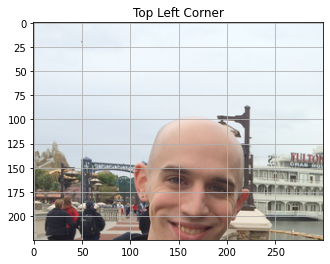

In [35]:
cX, cY = (w // 2, h // 2)
display(cY, cX)
t1 = image[0:cY, 0:cX]  
plt_imshow("Top Left Corner", t1)

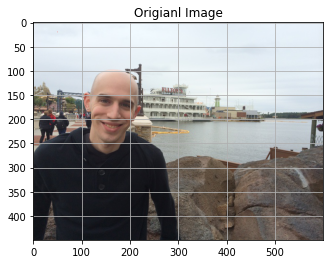

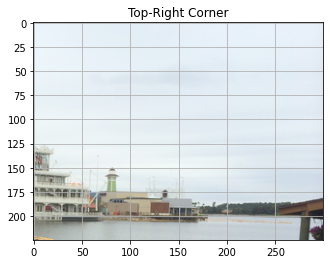

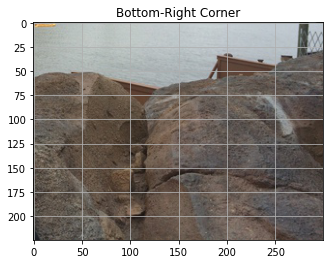

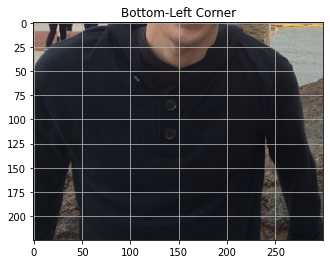

In [34]:
# 오른쪽 상단(top-right), 오른쪽하단(bottom-right), 왼쪽 하단(bottom-left)

tr = image[0:cY, cX:w]  # 오른쪽 상단
br = image[cY:h, cX:w]  # 오른쪽 하단
bl = image[cY:h, 0:cX]  # 왼쪽 하단
plt_imshow("Origianl Image", image)
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

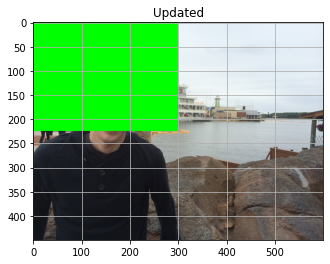

In [40]:
# 왼쪽 상단의 원래 이미지를 녹색으로 변경
# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 255, 0)  # (B, G, R)  # 0에 가까울수록 더 짙은 그린색으로 변경된다.

# Show our updated image
plt_imshow("Updated", image)

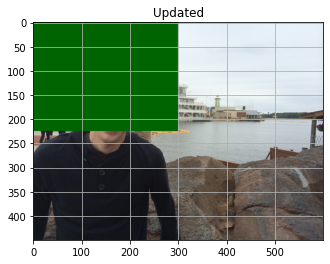

In [43]:
# 0에 가까운 색으로 변경
# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 100, 0)  # (B, G, R)  # 0에 가까울수록 더 짙은 그린색으로 변경된다.

# Show our updated image
plt_imshow("Updated", image)

### 정리
* image.shape - h(number of rows), w(number of columns)
* w가 증가하면 오른쪽으로 이동, 감소하면 왼쪽으로 이동
* h - y값이 증가하면 아래로 이동,감소하면 위로 이동
* R, G, B의 값이 0에 가까울수록 짙은 색깔이 표출 